<a href="https://colab.research.google.com/github/Randa1989/Demo/blob/main/car%20price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
import torch
import torch.nn as nn
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io
data=files.upload()

Saving Car Ownership.csv to Car Ownership.csv


In [4]:
df=pd.read_csv(io.StringIO(data['Car Ownership.csv'].decode('utf-8')))

In [ ]:
df.head()

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2


In [ ]:
df.shape

(500, 8)

In [ ]:
df.describe()

,Credit Score
count,460.000000
mean,702.969565
std,69.232323
min,500.000000
25%,650.000000
50%,700.000000
75%,750.000000
max,900.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Occupation           490 non-null    object 
 1   Monthly Income       487 non-null    object 
 2   Credit Score         460 non-null    float64
 3   Years of Employment  457 non-null    object 
 4   Finance Status       477 non-null    object 
 5   Finance History      472 non-null    object 
 6   Car                  480 non-null    object 
 7   Number of Children   375 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


In [ ]:
df.isnull().sum()

Occupation              10
Monthly Income          13
Credit Score            40
Years of Employment     43
Finance Status          23
Finance History         28
Car                     20
Number of Children     125
dtype: int64

In [ ]:
df['Monthly Income'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        40000
1        60000
2        25000
3        80000
4       100000
        ...   
495    $7,000 
496    $4,500 
497    $5,500 
498    $3,500 
499    $3,200 
Name: Monthly Income, Length: 500, dtype: object>

In [31]:
pd.set_option('display.max_columns',None)


In [ ]:
df.columns

Index(['Occupation', 'Monthly Income', 'Credit Score', 'Years of Employment',
       'Finance Status', 'Finance History', 'Car', 'Number of Children'],
      dtype='object')

Target Variables - Car¶


1.0    301
0.0    179
Name: Car, dtype: int64


<AxesSubplot:xlabel='Car', ylabel='count'>

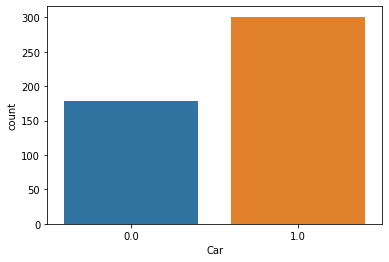

In [ ]:
df['Car'] = df.Car.map({'Yes':1,'No':0})
print(df.Car.value_counts())
sns.countplot(data=df, x='Car')

Categorical Variables¶


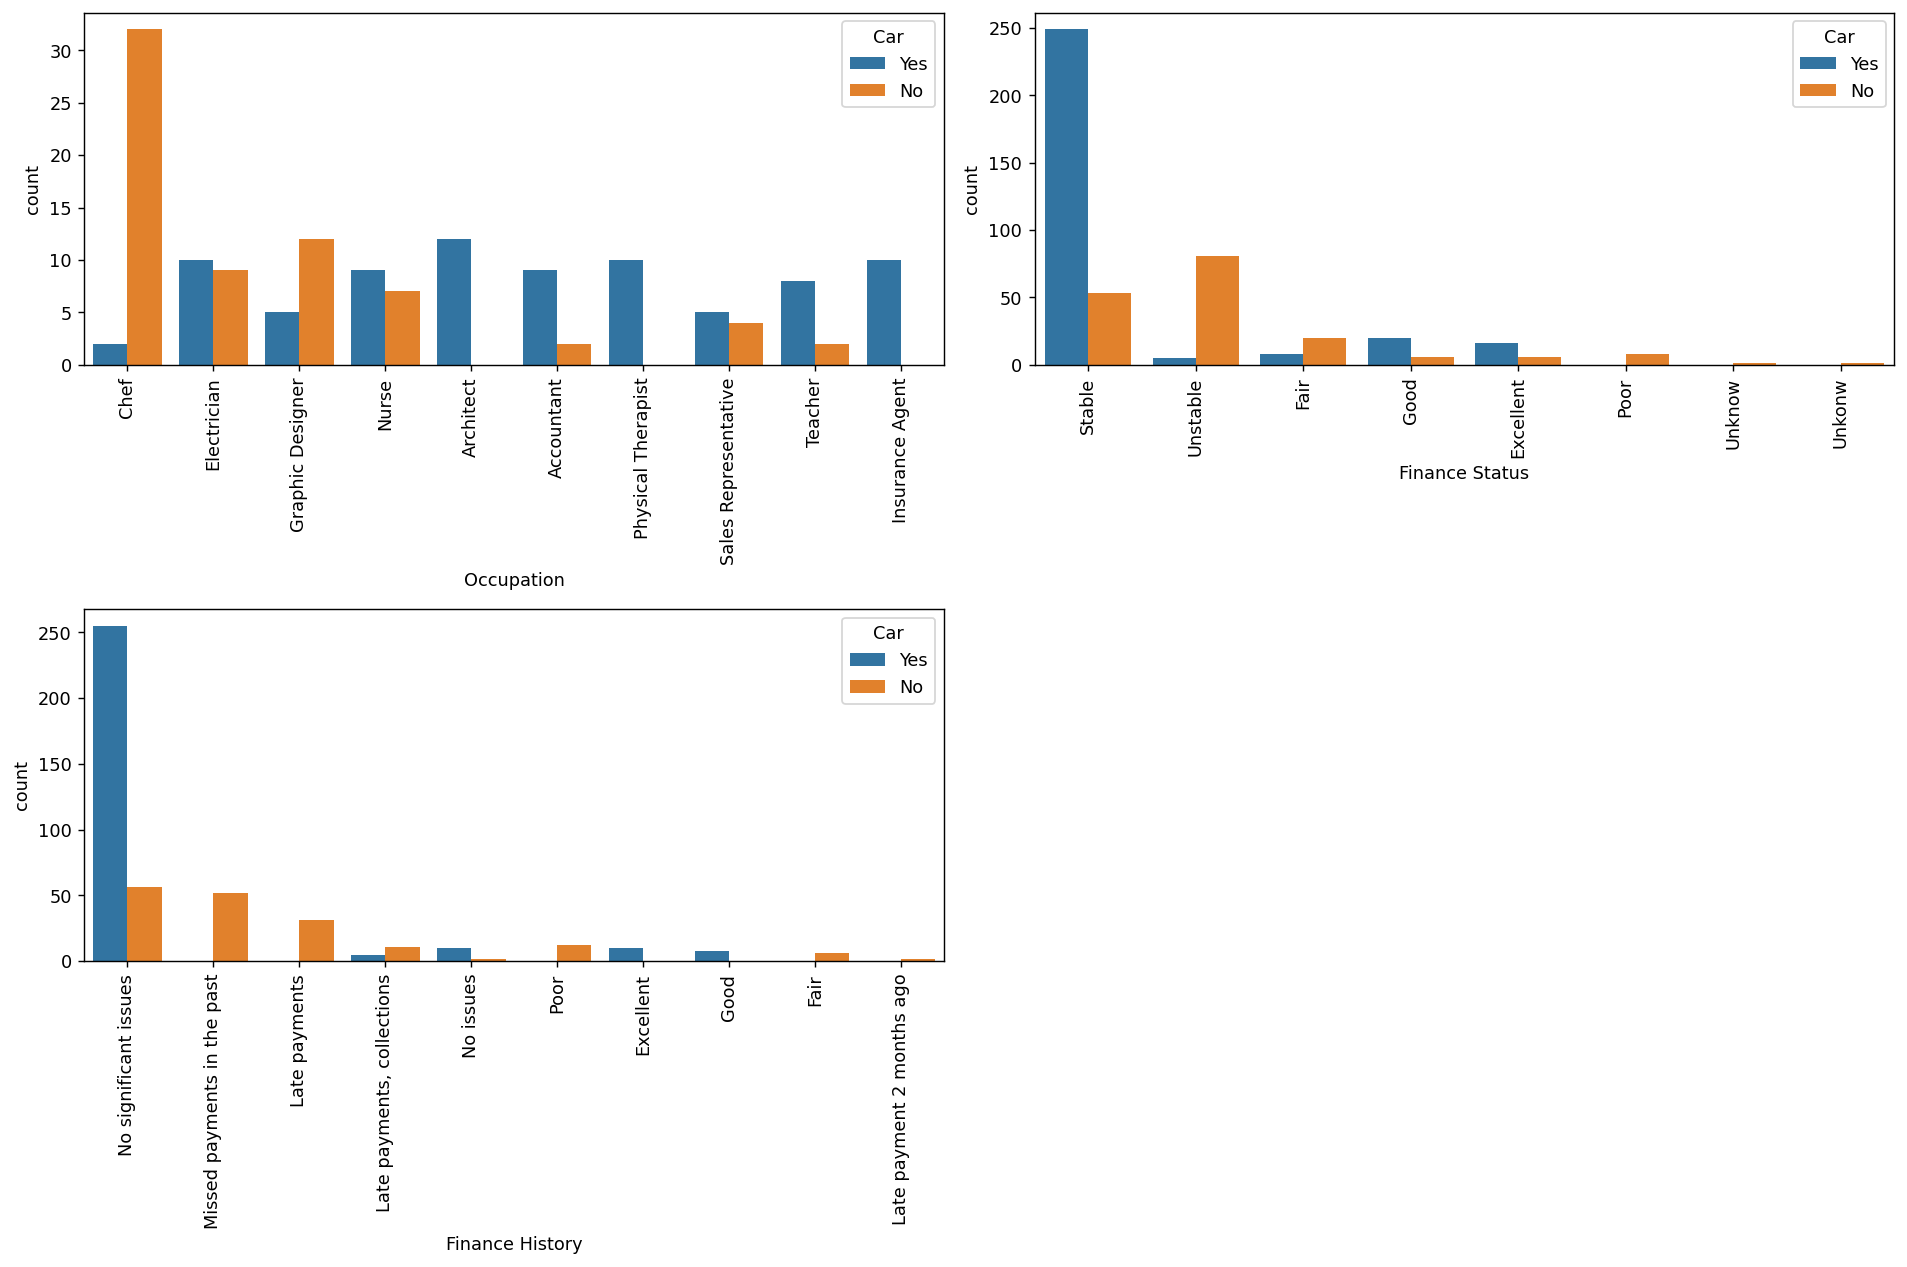

In [8]:
cat_col = ['Occupation','Finance Status','Finance History']
fig,ax = plt.subplots(dpi=128, figsize=(15,10))
for num,i in enumerate(cat_col,1):
    plt.subplot(2,2,num)
    sns.countplot(x=df[i],hue='Car',data=df,order=df[i].value_counts().head(10).index)
    plt.legend(title='Car',loc='upper right')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Data Preparing¶


In [15]:
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:str(x).replace('$','').replace(',','').replace('USD','').replace('usd',''))
df['Monthly Income'] = df['Monthly Income'].apply(lambda x:str(x).rstrip())


In [16]:
# Years of Employment column
df['Years of Employment'] = df['Years of Employment'].apply(lambda x:str(x).replace(' years','').replace(' year','').replace(' y',''))

In [17]:
# Finance History column
df['Finance History'] = df['Finance History'].apply(lambda x:str(x).replace('No significant issues','No significant issue').replace('Late payments','Late payment'))

In [19]:
# Finance Status column
df['Finance Status'] = df['Finance Status'].apply(lambda x:str(x).replace('Unkonw','Unknow'))

Numerical Variables¶


In [28]:
ax.hist(df[column_to_plot], color='yellow', edgecolor='black')

# تعيين العنوان والمحاور
ax.set_title(Monthly Income + ' Histogram')
ax.set_xlabel(Monthly Income)
ax.set_ylabel('Frequency')

SyntaxError: ignored